%% Cell type:markdown id:5fc6ee0e-481f-4399-9d03-c2499f5416a8 tags:
<a id="introduction"></a>
# Introduction
Voyons si nous pouvons confirmer une telle relation pour l'endettement *public*.
*NB1 : par souci de lisibilité, certaines fonctions ont été rassemblées dans des scripts et n'apparaissent pas directement dans ce notebook.*
*NB2 : les cartes sont dynamiques, mais ne s'affichent pas correctement sur gitlab.*
%% Cell type:markdown id:6f24dab8-1b5b-4806-b084-b1b210519358 tags:
<a id="sommaire"></a>
## Sommaire
- [Installation des librairies](#installation)
- [Collecte des données](#collecte)
  - [Données des évènements sportifs](#olympique)
  - [Données de dépenses](#depenses)
  - [Données "nationales"](#nationales)
- [Première agrégation de la base](#premiere)
  - [Création de variables de médailles par athlètes et de dépenses par habitant](par_habitant)
  - [Création de score olympique et paralympique](#score_olympique)
  - [Création de variables de moyenne temporelle de dépenses publiques](#moyennes)
  - [Suppression de certaines lignes et colonnes](#suppression)
- [Choix de la sélection de pays] (#sel_pays)
  - [Présentation de trois bases intéressantes] (#bases)
  - [Variance des variables] (#var)
  - [Valeurs manquantes] (#nan)
- [Statistiques descriptives] (stat_desc)
  - [Moyennes et valeurs extrêmales] (moyenne_extrem)
  - [Nuages de points] (#nuages)
  - [Matrice de corrélation] (#correlation)
- [Analyse] (#analyse)
  - [Regression linéaire entre scores olympiques] (#reg_lin)
  - [ACP entre score paralympiques et statistiques propres au pays] (#ACP)
  - [Conclusions] (#conclusions)
- [Conclusion et perspectives](#suites)


<a id="installation"></a>
## Installation des librairies

In [30]:
!pip install -r requirements.txt

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [31]:
from Toutes_les_df_olympiques.df_medailles_olympiques import get_medal_table as get_medal_table_olympic
from Toutes_les_df_olympiques.df_athletes_olympiques import get_athlete_table as get_athlete_table_olympic
from Toutes_les_df_de_depenses.df_depenses_publiques import get_public_expend
from Toutes_les_df_de_depenses.df_education import get_education

<a id="collecte"></a>
## Collecte des données

<a id="olympique"></a>
### Données des évènements sportifs

Dans les données d'évènements sportifs, on cherche à collecter le nombre de médailles de chaque type par édition et par nation ainsi que le nombre d'athètes par nation et par édition.

Nous procédons par scrapping sur Wikipédia. Cependant, les pages Wikipédia des jeux antérieurs à 2012 n'affichent pas le nombre d'athlètes par pays. Nous nous restreindrons alors aux jeux entre 2012 et 2024. 

Les fonctions get_..._table permettent de scrapper les données, ici un exemple pour le nombre de médailles et d'athlètes aux jeux olympiques de Rio 2016.

In [32]:
url_medailles="https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table" #Tableau des médailles des jeux olympiques de 2016

df_medailles = get_medal_table_olympic(2016,url_medailles)
u=0  #u est un compteur qui vérifie qu'on a le df tel qu'il est généré par cette cellule
df_medailles

,pays,or_olympique,argent_olympique,bronze_olympique,total_medailles_olympiques,annee
0,United States,46,37,38,121,2016
1,Great Britain,27,23,17,67,2016
2,China,26,18,26,70,2016
3,Russia‡,19,17,20,56,2016
4,Germany,17,10,15,42,2016
5,Japan,12,8,21,41,2016
6,France,10,18,14,42,2016
7,South Korea,9,3,9,21,2016
8,Italy,8,12,8,28,2016
9,Australia,8,11,10,29,2016


In [33]:
url_athletes= "https://en.wikipedia.org/wiki/2016_Summer_Olympics" #Page Wikipedia des athlètes olympiques en 2016

df_athletes = get_athlete_table_olympic(2016,url_athletes)

df_athletes

,pays,athletes_olympiques,annee
0,United States,554,2016
1,Brazil,465,2016
2,Germany,425,2016
3,Australia,421,2016
4,China,413,2016
5,France,399,2016
6,Great Britain,366,2016
7,Japan,338,2016
8,Canada,314,2016
9,Italy,309,2016


Chauvins, nous décidons d'avoir une base de données en français, on traduit les noms de pays et corrige des problèmes de typographie avec un dictionnaire (créé par Mistral AI car nous sommes chauvins).

In [34]:
from Toutes_les_df_olympiques.df_medailles_olympiques import countries_en_fr_cio

if u==0 :
    df_medailles["pays"] = (
    df_medailles["pays"].str.replace(r"[^A-Za-z ,\-']", "", regex=True).str.strip()
    )
    df_medailles["pays"] = df_medailles["pays"].map(countries_en_fr_cio)
    u=1

df_medailles.head(-1)
#la dernière ligne est un NaN car "Total"
#n'est pas dans le dictionnaire et le total de médailles ne sera pas utile par la suite

,pays,or_olympique,argent_olympique,bronze_olympique,total_medailles_olympiques,annee
0,États-Unis,46,37,38,121,2016
1,Royaume-Uni,27,23,17,67,2016
2,Chine,26,18,26,70,2016
3,Russie,19,17,20,56,2016
4,Allemagne,17,10,15,42,2016
5,Japon,12,8,21,41,2016
6,France,10,18,14,42,2016
7,Corée du Sud,9,3,9,21,2016
8,Italie,8,12,8,28,2016
9,Australie,8,11,10,29,2016


<a id="depenses"></a>
### Données de dépenses

Afin d'expliquer les différences de succès paralympique, nous collectons les données de dépenses publiques dans certains secteurs :  
    - Les loisirs et le sport (construction d'équipements sportifs, subventions aux associations sportives, organisation d'évènements...). Ces dépenses paraissent très liées à la culture du sport et donc à la réussite sportive.   
    - La gestion des maladies et de l'invalidité (soins hospitaliers, construction d'hôpitaux, constructions d'équipements d'aide aux handicapés...). Il semble aussi logique que des dispositifs d'aide aux malades et aux handicapés améliorent la réussite aux jeux paralympiques. Cependant, l'immense majorité de ces dépenses va dans les soins hospitaliers ce qui rend moins évident sa contribution à la réussite paralympique.  
    - L'aménagement du territoire (construction de routes, urbanisme, aménagement de zones commerciales...). Ces dépenses limitent l'isolement des zones peu densément peuplées et peuvent détecter plus facilement les athlètes à haut potentiel.  
    - L'éducation (construction d'écoles, salaire des professeurs, financement des écoles publiques...). Cette variable est mentionnée dans cet article comme un déterminant de la réussite olympique, essayons donc de voir si ce résultat persiste au niveau paralympique.  

https://medium.com/@mmvillar/is-the-distribution-of-olympic-medals-truly-fair-378e509bf80e

Pour collecter les données de dépense en aménagement du territoire/ loisirs et sports et maladie et invalidité, on utilise l'API de Eurostat.

Chacun de ces secteurs est associé à un numéro GF.... et donne la part du PIB investie dans le secteur.

Nous n'avons accès à ces données que pour les pays européens ce qui posera problème dans le choix des pays sélectionnés dans la base de données finales.

In [35]:
from eurostat import get_data_df
from Toutes_les_df_de_depenses.df_depenses_publiques import pays_dict
from Toutes_les_df_de_depenses.df_depenses_publiques import cofog_labels


df_depenses = get_public_expend()
df_depenses['pays'] = df_depenses['pays'].map(pays_dict)
df_depenses['cofog99'] = df_depenses['cofog99'].map(cofog_labels)
df_depenses.rename(columns={'cofog99': 'type_depense'}, inplace=True)

df_depenses = df_depenses.pivot_table(
    index=['pays', 'annee'],
    columns='type_depense',
    values='depense', 
    aggfunc='first'
).reset_index()

df_depenses

type_depense,pays,annee,amenagement_territoire,loisirs_sports,maladie_invalidite
0,Allemagne,2000,0.2,0.3,2.7
1,Allemagne,2001,0.2,0.3,2.7
2,Allemagne,2002,0.2,0.3,2.8
3,Allemagne,2003,0.2,0.3,2.8
4,Allemagne,2004,0.2,0.3,2.7
5,Allemagne,2005,0.2,0.3,2.5
6,Allemagne,2006,0.2,0.3,2.4
7,Allemagne,2007,0.2,0.3,2.4
8,Allemagne,2008,0.2,0.3,2.5
9,Allemagne,2009,0.2,0.3,2.8


Pour l'éducation, nous y avons accès depuis l'API de la World Bank Data. Ces données concernent la plupart des pays du monde.

La table comporte aussi la dépense d'éducation dans des régions du monde (Monde Arabe, Hauts revenus, Asie Centrale ...). Elles seront supprimées lors de la jointure de toutes les tables.

In [36]:
import world_bank_data
from Toutes_les_df_de_depenses.df_education import country_mapping

df_education=get_education()

df_education['pays'] = df_education['pays'].replace(country_mapping)

df_education


,pays,annee,education
0,Afrique orientale et australe,2010,4.024030
1,Afrique orientale et australe,2011,4.639015
2,Afrique orientale et australe,2012,4.676120
3,Afrique orientale et australe,2013,4.637694
4,Afrique orientale et australe,2014,4.659660
5,Afrique orientale et australe,2015,4.737919
6,Afrique orientale et australe,2016,4.692000
7,Afrique orientale et australe,2017,4.430510
8,Afrique orientale et australe,2018,4.739750
9,Afrique orientale et australe,2019,4.511410


<a id="nationales"></a>
### Données "nationales"

Reste enfin les données que nous qualifierons de "nationales" : le PIB par habitant et l'IDH.

Les données sont collectées grâce à un csv et un excel. Nous n'avons pris ces variables que depuis 2008; nous nous servirons de ces variables sans faire de calculs nécessitant les années d'avant.

Par souci de lisibilité, on ne détaillera pas leur collecte qui est presque similaire à celles précédentes.

In [37]:
df_pib_par_habitant=pd.read_pickle('Toutes_les_df_nationales/df_pib_par_habitant.pkl')
df_pib_par_habitant

,pays,annee,pib_habitant
0,Aruba,2008,28171.909401
1,NaN,2008,1421.118613
2,Afghanistan,2008,381.733238
3,NaN,2008,1668.841082
4,Angola,2008,4103.066900
5,Albanie,2008,4498.504868
6,Andorre,2008,49132.515708
7,Le monde arabe,2008,6091.932064
8,Émirats arabes unis,2008,50054.170068
9,Argentine,2008,8944.110266


Les pays avec un NaN sont les régions du monde qui ne sont transformées en NaN à la traduction du DataFrame.

Pour l'IDH on a toujours les NaN qui sont les régions du monde, on dispose de cette table :

In [38]:
df_idh=pd.read_pickle('Toutes_les_df_nationales/df_idh.pkl')
df_idh

,pays,annee,idh
0,Afghanistan,2008,0.446
1,Albanie,2008,0.749
2,Algérie,2008,0.711
3,Andorre,2008,0.864
4,Angola,2008,0.504
5,Antigua-et-Barbuda,2008,0.830
6,Argentine,2008,0.833
7,Arménie,2008,0.743
8,Australie,2008,0.924
9,Autriche,2008,0.907


<a id="premiere"></a>
## Première agrégation de la base

On commence évidemment par joindre toutes les tables présentées plus tôt sur le couple (pays,annee).

In [39]:
from Toutes_les_df_olympiques.df_medailles_paralympiques import df_para as df_medailles_paralympiques
from Toutes_les_df_olympiques.df_athletes_paralympiques import df_para as df_athletes_paralympiques
from Toutes_les_df_olympiques.df_medailles_olympiques import df_medailles as df_medailles_olympiques
from Toutes_les_df_olympiques.df_athletes_olympiques import df_athletes as df_athletes_olympiques
from Toutes_les_df_de_depenses.df_depenses_publiques import df_longue as df_depenses_publiques

df_merge = df_medailles_olympiques.merge(
    df_medailles_paralympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_athletes_olympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_athletes_paralympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_depenses_publiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_education, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_idh, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_pib_par_habitant, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")

,pays,or_olympique,argent_olympique,bronze_olympique,total_medailles_olympiques,annee,or_paralympique,argent_paralympique,bronze_paralympique,total_medailles_paralympiques,athletes_olympiques,athletes_paralympiques,amenagement_territoire,loisirs_sports,maladie_invalidite,education,idh,pib_habitant
1883,France,11.0,11.0,13.0,35.0,2012,8.0,19.0,18.0,45.0,324.0,158,0.7,0.6,2.7,NaN,0.893,40863.581441
1887,France,10.0,18.0,14.0,42.0,2016,9.0,5.0,14.0,28.0,399.0,126,0.6,0.5,2.8,NaN,0.905,37024.215713
1891,France,10.0,12.0,11.0,33.0,2020,11.0,15.0,29.0,55.0,398.0,137,0.6,0.5,3.1,5.65872,0.909,39169.860600
1895,France,16.0,26.0,22.0,64.0,2024,19.0,28.0,28.0,75.0,573.0,239,NaN,NaN,NaN,NaN,NaN,46150.487686


<a id="par_habitant"></a>
### Création de variables de médailles par athlètes et de dépenses par habitant

Sans ramener les variables au nombre d'athlètes, l'étude n'aurait que peu d'intérêt, on ramène donc les variables sportives au nombre d'athlètes présents et les variables de dépenses en valeur absolue par habitant.

Ici le nombre de médailles par athlète aux jeux paralympiques:

In [40]:
df_merge['athletes_olympiques'] = pd.to_numeric(df_merge['athletes_olympiques'], errors='coerce')
df_merge['athletes_paralympiques'] = pd.to_numeric(df_merge['athletes_paralympiques'], errors='coerce')
df_merge["annee"] = pd.to_numeric(df_merge["annee"], errors='coerce')

df_merge['or_paralympique_par_athlete'] = df_merge['or_paralympique'] / df_merge['athletes_paralympiques']
df_merge['argent_paralympique_par_athlete'] = df_merge['argent_paralympique'] / df_merge['athletes_paralympiques']
df_merge['bronze_paralympique_par_athlete'] = df_merge['bronze_paralympique'] / df_merge['athletes_paralympiques']
df_merge['total_medailles_paralympiques_par_athlete'] = df_merge['total_medailles_paralympiques'] / df_merge['athletes_paralympiques']

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")[['pays','annee', 'or_paralympique_par_athlete',
'argent_paralympique_par_athlete','bronze_paralympique_par_athlete','total_medailles_paralympiques_par_athlete']]

,pays,annee,or_paralympique_par_athlete,argent_paralympique_par_athlete,bronze_paralympique_par_athlete,total_medailles_paralympiques_par_athlete
1883,France,2012.0,0.050633,0.120253,0.113924,0.284810
1887,France,2016.0,0.071429,0.039683,0.111111,0.222222
1891,France,2020.0,0.080292,0.109489,0.211679,0.401460
1895,France,2024.0,0.079498,0.117155,0.117155,0.313808


Et ici les dépenses par habitant dans chaque secteur :

In [41]:
df_merge['amenagement_territoire_par_habitant'] = df_merge['amenagement_territoire'] * df_merge['pib_habitant']
df_merge['loisirs_sports_par_habitant'] = df_merge['loisirs_sports'] * df_merge['pib_habitant']
df_merge['maladie_invalidite_par_habitant'] = df_merge['maladie_invalidite'] * df_merge['pib_habitant']
df_merge['education_par_habitant'] = df_merge['education'] * df_merge['pib_habitant']

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")[['pays','annee', 'amenagement_territoire_par_habitant',
'loisirs_sports_par_habitant','maladie_invalidite_par_habitant','education_par_habitant']]

,pays,annee,amenagement_territoire_par_habitant,loisirs_sports_par_habitant,maladie_invalidite_par_habitant,education_par_habitant
1883,France,2012.0,28604.507009,24518.148865,110331.669891,NaN
1887,France,2016.0,22214.529428,18512.107857,103667.803997,NaN
1891,France,2020.0,23501.916360,19584.930300,121426.567860,221651.27422
1895,France,2024.0,NaN,NaN,NaN,NaN


<a id="score_olympique"></a>
### Création de score olympique et paralympique

Pour évaluer la performance sportive, deux variables sont immédiates : le total de médailles et le classement aux Jeux.

Cependant, le classement aux Jeux valorise trop les médailles d'or (avoir une médaille d'or et zéro médailles d'argent nous place devant un pays avec zéro médailles d'or et dix d'argent) et le total de médailles pas assez.

Nous créons donc un score olympique et paralympique rapportant trois points par médaille d'or, deux par médaille d'argent, un par médaille de bronze le tout ramené au nombre d'athlètes.

Ici la table pour le score paralympique en 2016 :

In [42]:
df_merge['score_paralympique'] = (3 * df_merge['or_paralympique_par_athlete'] + 
                                 2 * df_merge['argent_paralympique_par_athlete'] + 
                                 df_merge['bronze_paralympique_par_athlete'])

df_merge.query("annee==2016")[['pays','annee','score_paralympique','total_medailles_paralympiques_par_athlete']].sort_values(by='score_paralympique', ascending=False) \
        .head(10)

,pays,annee,score_paralympique,total_medailles_paralympiques_par_athlete
3528,Ouganda,2016.0,2.000000,1.000000
5027,Trinité-et-Tobago,2016.0,2.000000,1.000000
1178,Chine,2016.0,1.733766,0.775974
3545,Ouzbékistan,2016.0,1.656250,0.968750
736,Bahreïn,2016.0,1.500000,0.500000
1436,Cuba,2016.0,1.454545,0.681818
3477,Nouvelle-Zélande,2016.0,1.419355,0.677419
5112,Ukraine,2016.0,1.404762,0.696429
4015,Qatar,2016.0,1.333333,0.666667
862,Biélorussie,2016.0,1.300000,0.500000


Ne raisonner que par le score va poser un problème : surreprésenter les pays ayant un athlète exceptionnel mais aucun autre athlète disputant les Jeux. L'Ouganda montre ce problème. Il faudra en prendre compte lors de la sélection des pays.

<a id="moyennes"></a>
### Création d'une moyenne depuis 2008 pour chaque dépense publique

Le problème de considérer une dépense publique à un instant t est qu'un pays bénéficie généralement des investissements faits précédemment. On utilisera donc plutôt des variables de moyenne des dépenses publiques depuis 2008.

De plus, cette méthode réduit le nombre de NaN. Par exemple, il n'y a pas de valeur d'éducation de la France en 2024 mais bien une valeur de moyenne d'éducation.

In [43]:
from Toutes_les_df_agregees.fonction_moyenne import creation_moyenne

creation_moyenne(df_merge)

u_2=0 #Sert à pouvoir rééxécuter la cellule suivante
df_merge.query("pays == 'France' and annee==2024")[['pays','annee','moy_amenagement_2008','moy_loisirs_2008',
'moy_maladie_2008','moy_education_2008']]

,pays,annee,moy_amenagement_2008,moy_loisirs_2008,moy_maladie_2008,moy_education_2008
1895,France,2024.0,27759.0728,23039.075135,114870.896502,221707.363482


<a id="suppression"></a>
### Suppression de certaines lignes et colonnes

N disposons désormais d'une base de données avec de nombreuses colonnes et observations. Cependant, il convient de restreindre nos observations et nos variables. 

On supprime donc les variables non ramenées au nombre d'athlètes / habitants, cela n'a pas vraiment de sens de comparer ces variables entre les pays.

On supprime aussi les pays n'ayant jamais ramené un seul athlète aux Jeux Olympiques notamment pour enlever les régions (Afrique du Nord, Haut Revenu etc...) issues de la collecte des données.

On garde cependant les années non olympiques et les variables à un instant t qui seront utiles aux statistiques descriptives.

In [44]:
if u_2==0:
    #Suppression des pays n'ayant jamais amené d'athlètes aux jeux olympiques (permet surtout d'enlever les groupes de pays présents dans certaines bases : Afrique du Nord, etc...)
    df_merge = df_merge[df_merge.groupby('pays')['athletes_olympiques'].transform('sum') > 0]

    #Suppression des variables non ramenées au nombre d'athlètes/habitants
    df_merge = df_merge.drop('or_olympique', axis=1)
    df_merge = df_merge.drop('argent_olympique', axis=1)
    df_merge = df_merge.drop('bronze_olympique', axis=1)
    df_merge = df_merge.drop('total_medailles_olympiques', axis=1)
    df_merge = df_merge.drop('or_paralympique', axis=1)
    df_merge = df_merge.drop('argent_paralympique', axis=1)
    df_merge = df_merge.drop('bronze_paralympique', axis=1)
    df_merge = df_merge.drop('total_medailles_paralympiques', axis=1)
    df_merge = df_merge.drop('amenagement_territoire', axis=1)
    df_merge = df_merge.drop('maladie_invalidite', axis=1)
    df_merge = df_merge.drop('loisirs_sports', axis=1)
    df_merge = df_merge.drop('education', axis=1)

df_merge.query("pays == 'France' and annee == 2020") #NB Dans ce notebook, on n'a pas créé la variable de score olympique, mais elle est bien dans le code

,pays,annee,athletes_olympiques,athletes_paralympiques,idh,pib_habitant,or_paralympique_par_athlete,argent_paralympique_par_athlete,bronze_paralympique_par_athlete,total_medailles_paralympiques_par_athlete,amenagement_territoire_par_habitant,loisirs_sports_par_habitant,maladie_invalidite_par_habitant,education_par_habitant,score_paralympique,moy_education_2008,moy_loisirs_2008,moy_amenagement_2008,moy_maladie_2008
1891,France,2020.0,398.0,137.0,0.909,39169.8606,0.080292,0.109489,0.211679,0.40146,23501.91636,19584.9303,121426.56786,221651.27422,0.671533,217658.521862,22976.122834,27491.456041,111776.827818


<a id="sel_pays"></a>
## Quels pays sélectionner pour l'analyse ?

Nous avons désormais une base très grande, utilisons des statistiques descriptives pour déterminer quels pays nous permettrons de faire l'analyse la plus pertinente.

<a id="bases"></a>
### Le problème de table avec tous les pays : la variance des variables explicatives

Si la table df_tous_pays contient plusieurs milliers d'observations, il reste un problème important. Les variables explicatives (PIB par habitant, IDH, dépenses par habitant) sont extrêmement variables.

In [51]:
from statistiques_descriptives.Stat_descr import coef_variation

df_tous_pays=pd.read_pickle("Toutes_les_df_agregees/df_tous_pays.pkl")

df_cv_tous_pays=coef_variation(df_tous_pays)

df_cv_tous_pays

,Variable,Moyenne,CV (%),Observations
0,total_medailles_olympiques_par_athlete,0.103038,74.816645,357
1,total_medailles_paralympiques_par_athlete,0.349923,57.916799,328
2,moy_amenagement_2008,7889.104386,111.846878,104
3,moy_maladie_2008,97492.726820,89.940841,104
4,moy_loisirs_2008,13512.757851,84.672868,104
5,moy_education_2008,76958.713671,146.834144,628
6,pib_habitant,17783.190239,155.304385,3119
7,idh,0.718348,21.451897,3064


Il est inadmissible d'utiliser une base dont l'écart-type de certaines variables est supérieur à leur moyenne.

On essaie donc de prendre les dix pays les plus riches (en terme de PIB par habitant) pour avoir a priori des variables un peu moins volatiles. On fait aussi attention à ne sélectionner des pays ayant amené au moins cinq athlètes en moyenne au cours des quatre précédents jeux paralympiques.

In [52]:
df_top_10=pd.read_pickle('Toutes_les_df_agregees/df_top_10.pkl')

pays = df_top_10['pays'].unique()
print(f"Les pays de cette nouvelle table sont : \n{', '.join(pays)}")

df_cv_top_10=coef_variation(df_top_10)

df_cv_top_10

Les pays de cette nouvelle table sont : 
Australie, Danemark, Irlande, Islande, Norvège, Pays-Bas, Singapour, Suisse, Suède, États-Unis


,Variable,Moyenne,CV (%),Observations
0,total_medailles_olympiques_par_athlete,0.093922,51.602531,35
1,total_medailles_paralympiques_par_athlete,0.370660,45.970998,37
2,moy_amenagement_2008,7989.719225,67.858017,16
3,moy_maladie_2008,240282.551695,24.076306,16
4,moy_loisirs_2008,24633.244311,40.551265,16
5,moy_education_2008,372972.166098,36.123532,36
6,pib_habitant,66199.947643,24.692906,170
7,idh,0.942431,1.668523,160


Cette sélection présente des résultats très encourageants, tous les coefficients de variation ont diminué d'environ de moitié pour la plupart. Cependant, un autre problème va nous empêcher d'utiliser cette table.

<a id="nan"></a>
### Valeurs manquantes, la table df_top_10 devient inutilisable

Le problème de cette table, c'est que comme la plupart de ses pays sont non européens, les données de dépenses publiques en aménagement du territoire, santé et loisirs sont inaccessibles.

Calculons le pourcentage de valeurs manquantes de cette table (en ne conservant que les années olympiques) :

In [53]:
from statistiques_descriptives.valeurs_manquantes import pourcentage_valeurs_manquantes

pourcentage_valeurs_manquantes(df_top_10)

,Variable,Pourcentage de valeurs manquantes
0,moy_maladie_2008,60.0
1,moy_amenagement_2008,60.0
2,moy_loisirs_2008,60.0
3,moy_education_2008,10.0
4,score_paralympique,7.5
5,score_olympique,12.5
6,pib_habitant,0.0
7,idh,25.0


Et en comparant à df_tous_pays, il n'y a pas photo :

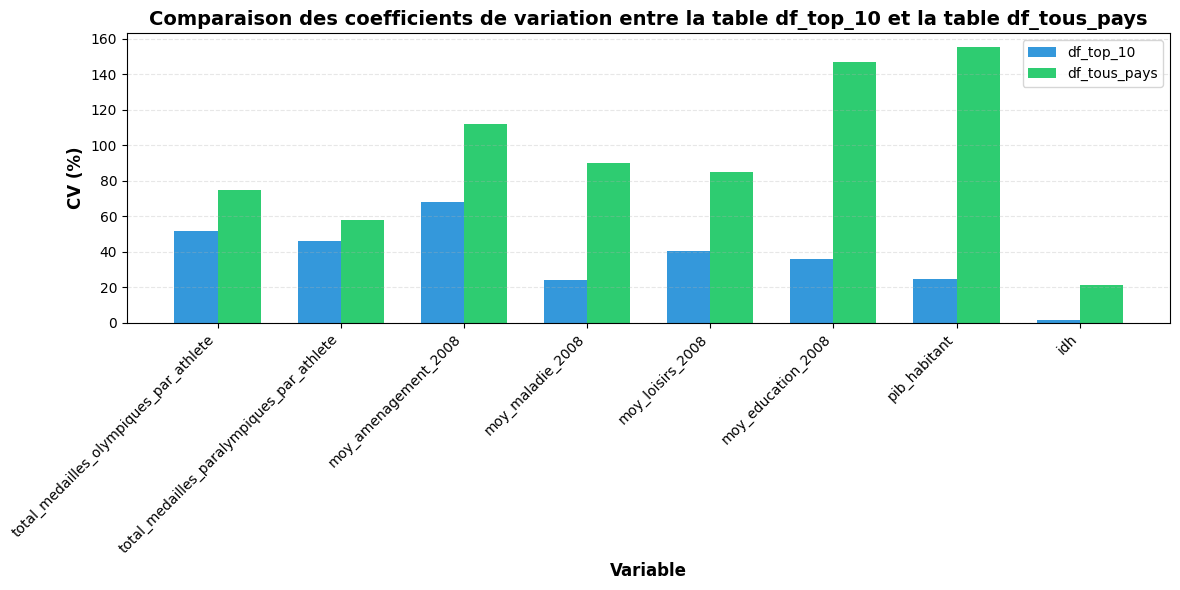

In [63]:
variables = df_cv_top_10['Variable'].values
cv_top10 = df_cv_top_10['CV (%)'].values
cv_tous_pays = df_cv_tous_pays[df_cv_tous_pays['Variable'].isin(variables)]['CV (%)'].values

#Créer le graphique
x = np.arange(len(variables))
largeur = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
barres1 = ax.bar(x - largeur/2, cv_top10, largeur, label='df_top_10', color='#3498db')
barres2 = ax.bar(x + largeur/2, cv_tous_pays, largeur, label='df_tous_pays', color='#2ecc71')

#Legende
ax.set_xlabel('Variable', fontsize=12, fontweight='bold')
ax.set_ylabel('CV (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des coefficients de variation entre la table df_top_10 et la table df_tous_pays', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

<a id="bases"></a>
### La table idéale

60% de valeurs manquantes pour des variables explicatives, c'est beaucoup trop. Voici alors une dernière table, qui parmi les pays ayant moins de 5 NaN, prend les 10 au plus haut PIB (sous réserve d'avoir amené suffisamment d'athlètes paralympiques).

In [64]:
df_top_10_sans_NaN=pd.read_pickle('Toutes_les_df_agregees/df_top_10_sans_NaN.pkl')

pays = df_top_10_sans_NaN['pays'].unique()
print(f"Les pays de cette nouvelle table sont : \n{', '.join(pays)}")

df_stats=coef_variation(df_top_10_sans_NaN)
df_nan=pourcentage_valeurs_manquantes(df_top_10_sans_NaN)
df_complet = df_nan.merge(df_stats, on='Variable', how='outer')
df_complet = df_complet.fillna('/') #Les NaN ici seront juste les variables qui ne sont présentes que dans df_stats ou que dans df_nan

df_complet

Les pays de cette nouvelle table sont : 
Allemagne, Autriche, Belgique, Danemark, Finlande, France, Irlande, Italie, Pays-Bas, Suède


,Variable,Pourcentage de valeurs manquantes,Moyenne,CV (%),Observations
0,idh,25.0,0.928744,2.221454,160.0
1,moy_amenagement_2008,0.0,9628.052441,84.019228,40.0
2,moy_education_2008,5.0,295649.622192,31.168089,38.0
3,moy_loisirs_2008,0.0,20021.665202,42.566761,40.0
4,moy_maladie_2008,0.0,169095.343365,45.175047,40.0
5,pib_habitant,0.0,51606.477681,24.330384,170.0
6,score_olympique,5.0,/,/,/
7,score_paralympique,0.0,/,/,/
8,total_medailles_olympiques_par_athlete,/,0.079586,39.811837,38.0
9,total_medailles_paralympiques_par_athlete,/,0.336557,44.938382,40.0


En voilà des résultats satisfaisants, hormis l'IDH nous n'avons presque aucun NaN dans les variables explicatives. Néanmoins, les coefficients de variation restent plus importants que dans la table précédente :

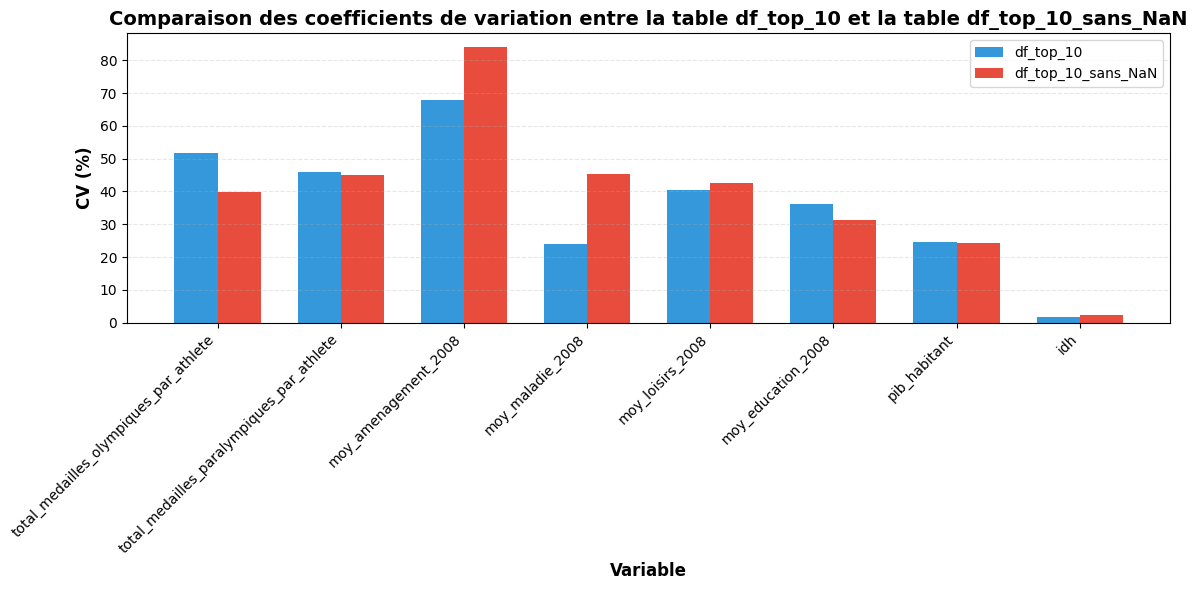

In [65]:
variables = df_cv_top_10['Variable'].values
cv_top10 = df_cv_top_10['CV (%)'].values
cv_stats = df_stats[df_stats['Variable'].isin(variables)]['CV (%)'].values

#Créer le graphique
x = np.arange(len(variables))
largeur = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
barres1 = ax.bar(x - largeur/2, cv_top10, largeur, label='df_top_10', color='#3498db')
barres2 = ax.bar(x + largeur/2, cv_stats, largeur, label='df_top_10_sans_NaN', color='#e74c3c')

#Legende
ax.set_xlabel('Variable', fontsize=12, fontweight='bold')
ax.set_ylabel('CV (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des coefficients de variation entre la table df_top_10 et la table df_top_10_sans_NaN', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

  - [Présentation de trois bases intéressantes] (#bases)
  - [Variance des variables] (#var)
  - [Valeurs manquantes] (#nan)